# Q1)


(360, 360)
Found 43 local maxima


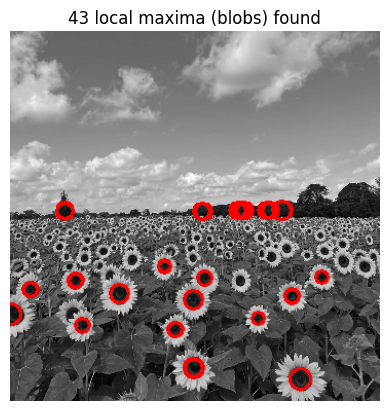

In [64]:
#working version with fixed kernal size 

import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, generate_binary_structure


def LoG_kernel(sigma):
    
    size = int(6 * 5 + 1)
    if size % 2 == 0:
     size += 1

    x = np.arange(-(size//2), size//2 + 1, 1)
    y = np.arange(-(size//2), size//2 + 1, 1)
    X, Y = np.meshgrid(x, y)
    # LoG formula
    norm = (X**2 + Y**2) / (2 * sigma**2)
    LoG = -1 / (np.pi * sigma**4) * (1 - norm) * np.exp(-norm)

    # Normalize kernel so sum of absolute values = 1
    LoG /= np.sum(np.abs(LoG))
    return LoG

def compute_scale_space(im, sigmas):
    scale_space = []
    for i in range(len(sigmas)):
        sigma = sigmas[i]
        k = LoG_kernel(sigma)
        #plt.figure()
        #plt.imshow(k)
        response = cv.filter2D(im, -1, k, borderType=cv.BORDER_REFLECT)
        response = (sigma**2) * np.abs(response)
        scale_space.append(response)
    return scale_space  


def generate_sigmas(sigma_min, sigma_max, n_sigmas):
    return np.geomspace(sigma_min, sigma_max, n_sigmas)


n_sigmas = 40
sigma_min = 2
sigma_max = 20

im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_GRAYSCALE)
#im = cv.imread('butterfly.jpg', cv.IMREAD_GRAYSCALE)
im = cv.resize(im, (im.shape[1]//4, im.shape[0]//4))
print(im.shape)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off') 
sigmas = generate_sigmas(sigma_min, sigma_max, n_sigmas)
scale_space = compute_scale_space(im, sigmas)




scale_space_arr = np.stack(scale_space, axis=-1)

# Define 3D neighborhood connectivity (26 neighbors in 3D)
neighborhood = generate_binary_structure(3, 3)
# Compute local maxima across space and scale
local_max = (scale_space_arr == maximum_filter(scale_space_arr, size=(10,10,10)))

# Optional threshold to remove weak responses
threshold = 0.5 * np.max(scale_space_arr)   # keep only strong maxima
local_max = np.logical_and(local_max, scale_space_arr >= threshold)

# Get coordinates of all local maxima (y, x, scale index)
maxima_coords = np.argwhere(local_max)

print(f"Found {len(maxima_coords)} local maxima")

# Convert to (x, y, sigma)
blobs = []
for y, x, s in maxima_coords:
    blobs.append((x, y, sigmas[s]))



im_color = cv.cvtColor(im, cv.COLOR_GRAY2BGR)

for x, y, sigma in blobs:
    radius = np.sqrt(2) * sigma
    cv.circle(im_color, (x, y), int(radius), (255, 0, 0), 2)

plt.imshow(im_color)
plt.title(f"{len(blobs)} local maxima (blobs) found")
plt.axis('off')
plt.show()


Found 27026 local maxima
[(0, 0, 16), (1, 0, 16), (2, 0, 16), (3, 0, 16), (4, 0, 16), (5, 0, 16), (6, 0, 16), (7, 0, 16), (8, 0, 16), (9, 0, 16), (10, 0, 16), (11, 0, 16), (12, 0, 16), (13, 0, 16), (14, 0, 16), (15, 0, 16), (16, 0, 16), (17, 0, 16), (18, 0, 16), (19, 0, 16), (20, 0, 16), (21, 0, 16), (22, 0, 16), (23, 0, 16), (24, 0, 16), (26, 0, 16), (27, 0, 16), (28, 0, 16), (29, 0, 16), (30, 0, 16), (31, 0, 16), (32, 0, 16), (33, 0, 16), (0, 1, 16), (1, 1, 16), (2, 1, 16), (3, 1, 16), (4, 1, 16), (5, 1, 16), (6, 1, 16), (7, 1, 16), (8, 1, 16), (9, 1, 16), (10, 1, 16), (11, 1, 16), (12, 1, 16), (13, 1, 16), (14, 1, 16), (15, 1, 16), (16, 1, 16), (17, 1, 16), (18, 1, 16), (19, 1, 16), (20, 1, 16), (21, 1, 16), (22, 1, 16), (23, 1, 16), (26, 1, 16), (27, 1, 16), (28, 1, 16), (29, 1, 16), (30, 1, 16), (31, 1, 16), (32, 1, 16), (33, 1, 16), (0, 2, 16), (1, 2, 16), (2, 2, 16), (3, 2, 16), (4, 2, 16), (5, 2, 16), (6, 2, 16), (7, 2, 16), (8, 2, 16), (9, 2, 16), (10, 2, 16), (11, 2, 16), (12

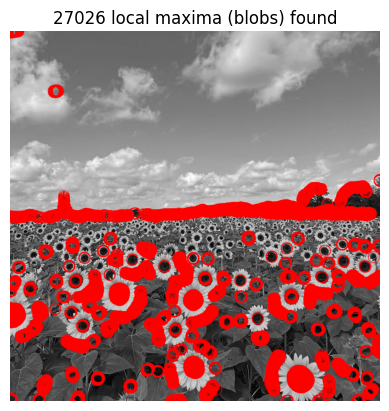

In [122]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, generate_binary_structure


def LoG_kernel(sigma):
    
    size = int(sigma*6 )
    if size % 2 == 0:
        size += 1  # make sure size is odd

    # Create coordinate grid
    x = np.arange(-(size//2), size//2 + 1, 1)
    y = np.arange(-(size//2), size//2 + 1, 1)
    X, Y = np.meshgrid(x, y)

    # LoG formula
    norm = (X**2 + Y**2) / (2 * sigma**2)
    LoG = -1 / (np.pi * sigma**4) * (1 - norm) * np.exp(-norm)

    # Normalize kernel so sum of absolute values = 1
    LoG /= np.sum(np.abs(LoG))

    return LoG


def generate_sigmas(sigma_min, n_sigmas):
    sigmas = []
    for i in range(1, n_sigmas+1):
        sigmas.append(i*sigma_min)
    return sigmas


def compute_scale_space(im, sigmas):
    scale_space = []
    for i in range(len(sigmas)):
        sigma = sigmas[i]
        k = LoG_kernel(sigma)
        #plt.figure(figsize=(4,4))
        #plt.imshow(k)
        #plt.figure()
        #plt.imshow(k)
        response = cv.filter2D(im, -1, k)
        response = (sigma**2) * response
        
        scale_space.append(response)
    return scale_space  

n_sigmas = 8
sigma_min = 2 #int(im.shape[0])//720

im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_GRAYSCALE)
#im = cv.imread('butterfly.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off') 
sigmas = generate_sigmas(sigma_min, n_sigmas)
scale_space = compute_scale_space(im, sigmas)




scale_space_arr = np.stack(scale_space, axis=-1)

# Define 3D neighborhood connectivity (26 neighbors in 3D)
neighborhood = generate_binary_structure(3, 3)
# Compute local maxima across space and scale
local_max = (scale_space_arr == maximum_filter(scale_space_arr, size=(3,3,1)))

# Optional threshold to remove weak responses
threshold = 0.2 * np.max(scale_space_arr)   # keep only strong maxima
local_max = np.logical_and(local_max, scale_space_arr >= threshold)

# Get coordinates of all local maxima (y, x, scale index)
maxima_coords = np.argwhere(local_max)

print(f"Found {len(maxima_coords)} local maxima")

# Convert to (x, y, sigma)
blobs = []
for y, x, s in maxima_coords:
    blobs.append((x, y, sigmas[s]))


print(blobs)
im_color = cv.cvtColor(im, cv.COLOR_GRAY2BGR)

#clean
for x, y, s in blobs:
    cv.circle(im_color, (x, y), int(np.sqrt(2) * s), (255, 0, 0), 1)


plt.imshow(im_color)
plt.title(f"{len(blobs)} local maxima (blobs) found")
plt.axis('off')
plt.show()

Found 15821 blobs
[(720, 0, 70), (721, 0, 70), (722, 0, 70), (723, 0, 70), (724, 0, 70), (725, 0, 70), (726, 0, 70), (727, 0, 70), (728, 0, 70), (729, 0, 70), (730, 0, 70), (731, 0, 70), (732, 0, 70), (733, 0, 70), (734, 0, 70), (735, 0, 70), (736, 0, 70), (737, 0, 70), (738, 0, 70), (739, 0, 70), (740, 0, 70), (741, 0, 70), (742, 0, 70), (743, 0, 70), (744, 0, 70), (745, 0, 70), (746, 0, 70), (747, 0, 70), (748, 0, 70), (749, 0, 70), (750, 0, 70), (751, 0, 70), (752, 0, 70), (753, 0, 70), (754, 0, 70), (755, 0, 70), (756, 0, 70), (757, 0, 70), (758, 0, 70), (759, 0, 70), (760, 0, 70), (761, 0, 70), (762, 0, 70), (763, 0, 70), (764, 0, 70), (720, 1, 70), (721, 1, 70), (722, 1, 70), (723, 1, 70), (724, 1, 70), (725, 1, 70), (726, 1, 70), (727, 1, 70), (728, 1, 70), (729, 1, 70), (730, 1, 70), (731, 1, 70), (732, 1, 70), (733, 1, 70), (734, 1, 70), (735, 1, 70), (736, 1, 70), (737, 1, 70), (738, 1, 70), (739, 1, 70), (740, 1, 70), (741, 1, 70), (742, 1, 70), (743, 1, 70), (744, 1, 70), (

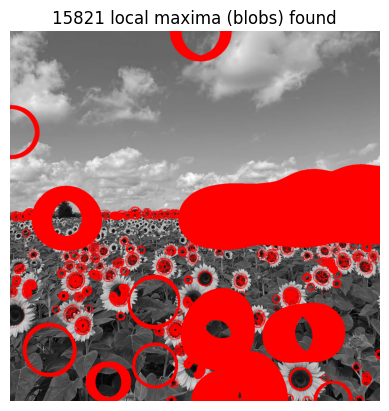

In [174]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import maximum_filter, generate_binary_structure


def LoG_kernel(sigma):
    
    size = int(sigma*6 )
    if size % 2 == 0:
        size += 1  # make sure size is odd

    # Create coordinate grid
    x = np.arange(-(size//2), size//2 + 1, 1)
    y = np.arange(-(size//2), size//2 + 1, 1)
    X, Y = np.meshgrid(x, y)

    # LoG formula
    norm = (X**2 + Y**2) / (2 * sigma**2)
    LoG = -1 / (np.pi * sigma**4) * (1 - norm) * np.exp(-norm)

    # Normalize kernel so sum of absolute values = 1
    LoG /= np.sum(np.abs(LoG))

    return LoG


def generate_sigmas(sigma_min, n_sigmas):
    sigmas = []
    for i in range(1, n_sigmas+1):
        sigmas.append(i*sigma_min)
    return sigmas


def compute_scale_space(im, sigmas):
    scale_space = []
    for i in range(len(sigmas)):
        sigma = sigmas[i]
        k = LoG_kernel(sigma)
        #plt.figure(figsize=(4,4))
        #plt.imshow(k)
        #plt.figure()
        #plt.imshow(k)
        response = cv.filter2D(im, -1, k)
        response = (sigma**2) * response
        
        scale_space.append(response)
    return scale_space  

n_sigmas = 7
sigma_min = 10 #int(im.shape[0])//720

im = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_GRAYSCALE)
#im = cv.imread('butterfly.jpg', cv.IMREAD_GRAYSCALE)
plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
plt.axis('off') 
sigmas = generate_sigmas(sigma_min, n_sigmas)
scale_space = compute_scale_space(im, sigmas)


scale_space_arr = np.stack(scale_space, axis=-1)
# Parameters
window_size = 1000 # local maxima neighborhood
blobs = []

# Go through scales from largest sigma to smallest
window_size = 10
blobs = []

for s in reversed(range(len(sigmas))):
    plane = scale_space_arr[:, :, s]

    # Find local maxima in this 2D plane
    local_max = (plane == maximum_filter(plane, size=window_size))
    local_max = np.logical_and(local_max, plane >= 0.9999 * np.max(plane))  

    coords = np.argwhere(local_max)

    for y, x in coords:
        if scale_space_arr[y, x, s] == 0:   # already suppressed
            continue

        # Save blob (x, y, sigma)
        blobs.append((x, y, sigmas[s]))

        # Compute radius ~ sqrt(2)*sigma
        r = int(np.ceil(np.sqrt(2) * sigmas[s]))

        # Create circular mask
        yy, xx = np.ogrid[:scale_space_arr.shape[0], :scale_space_arr.shape[1]]
        mask = (xx - x)**2 + (yy - y)**2 <= r**2

        # Suppress this circle area in all smaller scales
        scale_space_arr[mask, :s] = 0



print(f"Found {len(blobs)} blobs")
im_color = cv.cvtColor(im, cv.COLOR_GRAY2BGR)


print(blobs)
im_color = cv.cvtColor(im, cv.COLOR_GRAY2BGR)

#clean
for x, y, s in blobs:
    cv.circle(im_color, (x, y), int(np.sqrt(2) * s), (255, 0, 0), 1)


plt.imshow(im_color)
plt.title(f"{len(blobs)} local maxima (blobs) found")
plt.axis('off')
plt.show()

# Q2


In [ ]:
!pip install tikzplotlib

ERROR: Could not find a version that satisfies the requirement tikzplotlib2 (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tikzplotlib2


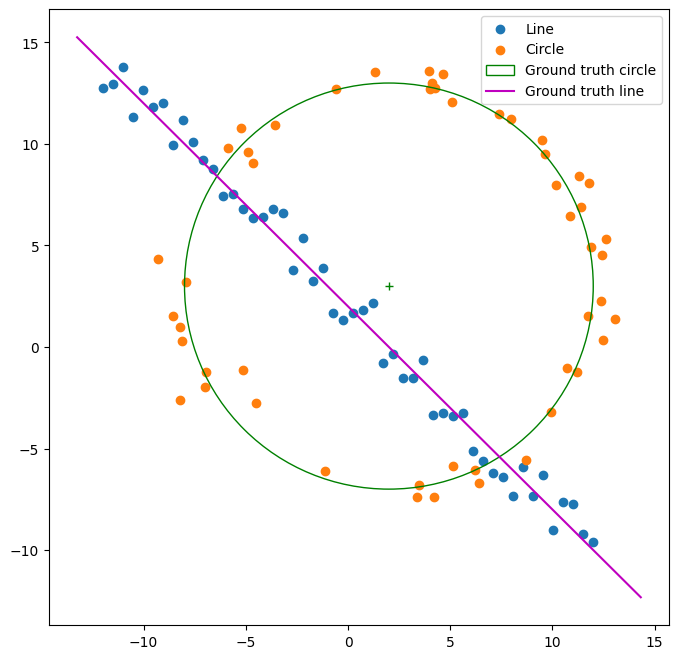

In [242]:
from scipy.optimize import minimize
from scipy import linalg
import matplotlib.pyplot as plt
import numpy as np

# np.random.seed(0)
N = 100
half_n = N // 2
r = 10
x0_gt, y0_gt = 2, 3  # Center
s = r / 16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s * np.random.randn(half_n)
x, y = x0_gt + (r + n) * np.cos(t), y0_gt + (r + n) * np.sin(t)
X_circ = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

s = 1.0
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m * x + b + s * np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

X = np.vstack((X_circ, X_line))  # All points

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.scatter(X_line[:, 0], X_line[:, 1], label='Line')
ax.scatter(X_circ[:, 0], X_circ[:, 1], label='Circle')

circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g', fill=False, label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot((x0_gt), (y0_gt), '+', color='g')

x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', label='Ground truth line')

plt.legend()
plt.show()


In [243]:
#print(X)
n = 2 
t= 1
k = 100 
p= 80

def get_abd():
    X1 = X[np.random.randint(0, X.shape[0])]
    X2 = X[np.random.randint(0, X.shape[0])]
    x1, y1 = X1
    x2, y2 = X2
    dx = x2 - x1
    dy = y2 - y1
    grad_line = dy/dx 
    normal_grad = -1/grad_line
    unit_v = np.array([1, normal_grad])
    unit_v = unit_v / np.linalg.norm(unit_v)
    d = unit_v[0]*x1 + unit_v[1]*y1
    return (unit_v[0], unit_v[1], d,X1,X2)



In [244]:
best_line = None
max_inliers = 0
best_x = None
best_inliers = None  # To store inlier points for the best line

for i in range(k):
    a, b, d, X1, X2 = get_abd()
    inliers_list = []  # Store inlier points for this iteration
    for x in X:
        dist = abs(a * x[0] + b * x[1] - d) / np.sqrt(a**2 + b**2)
        if dist < t:
            inliers_list.append(x)
    if len(inliers_list) > max_inliers:
        max_inliers = len(inliers_list)
        best_x = [X1, X2]
        best_line = [a, b, d]
        best_inliers = np.array(inliers_list)
    
        

print(f"Best line: {best_line}, with {max_inliers} inliers, best x: {best_x}")









Best line: [0.7301097410392123, 0.6833299101017417, 1.3858659678896024], with 46 inliers, best x: [array([ 2.20408163, -0.32686335]), array([-11.02040816,  13.80295693])]


In [245]:
import numpy as np
mask = np.ones(len(X), dtype=bool)
for p in best_inliers:
    # Check equality row-wise
    mask &= ~(np.all(X == p, axis=1))

remain_X = X[mask]

def are_collinear(p1, p2, p3, tol=1e-6):
    """
    Check if three points are collinear using the area of the triangle.
    Returns True if collinear.
    """
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    # Area formula for triangle
    area = 0.5 * abs(x1*(y2 - y3) + x2*(y3 - y1) + x3*(y1 - y2))
    return area < tol

def circle_from_3_points(p1, p2, p3):
    """
    Compute circle center (x0, y0) and radius r from 3 non-collinear points.
    """
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = p3
    
    # Solve using linear system derived from perpendicular bisectors
    A = np.array([
        [2*(x2 - x1), 2*(y2 - y1)],
        [2*(x3 - x1), 2*(y3 - y1)]
    ])
    B = np.array([
        x2**2 + y2**2 - x1**2 - y1**2,
        x3**2 + y3**2 - x1**2 - y1**2
    ])
    
    # Solve for circle center
    x0, y0 = np.linalg.solve(A, B)
    
    # Compute radius
    r = np.sqrt((x1 - x0)**2 + (y1 - y0)**2)
    return x0, y0, r

In [246]:
best_circle = None
max_circle_inliers = []
best_circle_points = None  # to store the 3 points that defined the best circle

for _ in range(k):
    indices = np.random.choice(len(remain_X), 3, replace=False)
    p1, p2, p3 = remain_X[indices]
    
    if not are_collinear(p1, p2, p3):
        x0, y0, r = circle_from_3_points(p1, p2, p3)
        
        # Check inliers
        circle_inlier_list = []
        for p in remain_X:
            x, y = p
            dist = np.sqrt((x - x0)**2 + (y - y0)**2)
            error = abs(dist - r)
            if error < t:  # within tolerance
                circle_inlier_list.append(p)
        
        # If better than current best, update
        if len(circle_inlier_list) > len(max_circle_inliers):
            max_circle_inliers = circle_inlier_list
            best_circle = (x0, y0, r)
            best_circle_points = [p1, p2, p3]  # save defining points

if best_circle is not None:
    print(f"Best circle: Center=({best_circle[0]:.3f}, {best_circle[1]:.3f}), "
          f"Radius={best_circle[2]:.3f}, Inliers={len(max_circle_inliers)}")
    print(f"Best circle defined by points: {best_circle_points}")
else:
    print("No circle found.")


Best circle: Center=(2.107, 2.733), Radius=10.218, Inliers=44
Best circle defined by points: [array([ 3.39759267, -7.40282645]), array([-6.97523882, -1.94959755]), array([ 7.37844636, 11.48619458])]


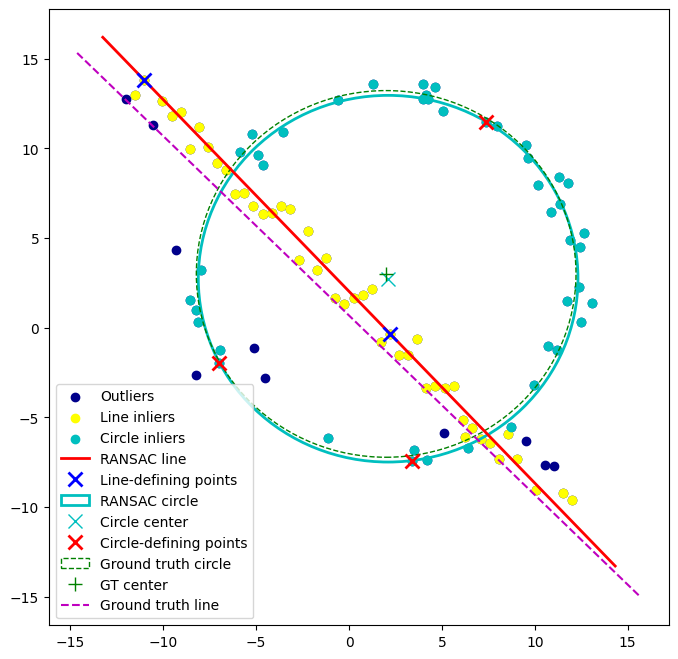

In [247]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

# Plot all points (outliers shown in light gray initially)
ax.scatter(X[:, 0], X[:, 1], color='darkblue', label='Outliers')

# Line inliers in yellow
if best_inliers is not None and len(best_inliers) > 0:
    ax.scatter(best_inliers[:, 0], best_inliers[:, 1],
               color='yellow', label='Line inliers')

# Circle inliers in cyan
if max_circle_inliers is not None and len(max_circle_inliers) > 0:
    max_circle_inliers = np.array(max_circle_inliers)
    ax.scatter(max_circle_inliers[:, 0], max_circle_inliers[:, 1],
               color='c', label='Circle inliers')

# Best RANSAC line
if best_line is not None:
    a, b, d = best_line
    x_min, x_max = ax.get_xlim()
    y_min, y_max = (d - a * x_min) / b, (d - a * x_max) / b
    ax.plot([x_min, x_max], [y_min, y_max],
            color='r', linewidth=2, label='RANSAC line')

# Line-defining points in blue crosses
for i, pt in enumerate(best_x):
    ax.plot(pt[0], pt[1], 'x', color='blue',
            markersize=10, markeredgewidth=2,
            label='Line-defining points' if i == 0 else "")

# Plot the best RANSAC circle
if best_circle is not None:
    x0, y0, r = best_circle
    ransac_circle = plt.Circle((x0, y0), r, color='c',
                               fill=False, linewidth=2,
                               label='RANSAC circle')
    ax.add_patch(ransac_circle)
    ax.plot(x0, y0, 'x', color='c', markersize=10, label='Circle center')

    # Mark the 3 points that defined the best circle
    if best_circle_points is not None:
        for i, pt in enumerate(best_circle_points):
            ax.plot(pt[0], pt[1], 'x', color='red', markersize=10,
                    markeredgewidth=2,
                    label='Circle-defining points' if i == 0 else "")


# Ground truth circle
circle_gt = plt.Circle((x0_gt, y0_gt), r, color='g',
                       fill=False, linestyle='--',
                       label='Ground truth circle')
ax.add_patch(circle_gt)
ax.plot(x0_gt, y0_gt, '+', color='g', markersize=10, label='GT center')

# Ground truth line
x_min, x_max = ax.get_xlim()
x_ = np.array([x_min, x_max])
y_ = m * x_ + b
plt.plot(x_, y_, color='m', linestyle='--', label='Ground truth line')

# Remove duplicate legend entries
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

plt.show()
